# QRS detection

In [2]:
import matplotlib.pyplot    as plt
import numpy                as np
import parameters
import wfdb
import socket

%matplotlib inline

# determine the paths for data/annotations based off the computer name
hostname=socket.gethostname()

if hostname=='alistair-pc70':
    data_path = '/data/challenge-2015/data/'
    ann_path = '/data/challenge-2015/ann/'
else:
    data_path = 'sample_data/challenge_training_data/'
    ann_path = 'sample_data/challenge_training_ann/'

In [14]:
def plot_annotations(data_path, ann_path, sample_name, ann_types_list, channel, fs, start, end): 
    sig, fields = wfdb.rdsamp(data_path + sample_name)
    time_vector = np.linspace(float(start)/fs, float(end)/fs, end-start)
    
    print "fields: ", fields['signame']
    
    # plot the time series
    plt.figure(figsize=[16, 10])
    plt.plot(time_vector, sig[start:end, channel], '-',
             color=parameters.COLORS[0], linewidth=2, 
             label=fields['signame'][channel])
    
    if len(ann_types_list) > len(parameters.MARKER_TYPES) or len(ann_types_list) > len(parameters.COLORS)-1: 
        raise RuntimeException("too many types of annotations to plot")
    
    for index in range(len(ann_types_list)): 
        ann_type = ann_types_list[index]
        annotation = wfdb.rdann(ann_path + sample_name, ann_type, sampfrom = start, sampto = end)
        
        plt.plot(time_vector[annotation[0]], sig[annotation[0], channel],
             color=parameters.COLORS[index + 1],
             linestyle='none', linewidth=3,
             marker=parameters.MARKER_TYPES[index], markersize=12,
             label=ann_type)
        
    plt.xlabel('Time (seconds)',fontsize=16)
    plt.legend(fontsize=16)
    plt.grid()
    plt.show()

fields:  ['II', 'V', 'PLETH', 'RESP']


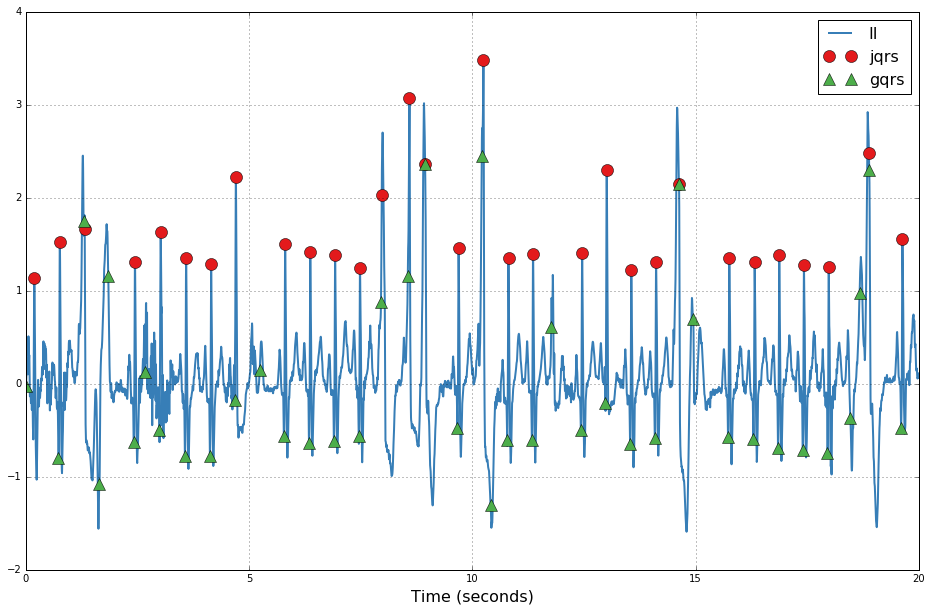

In [24]:
fs = parameters.FS
sample_name = 'v532s'
start = 0
end = 5000

# choose the lead to plot (annotations are generated off the first lead)
channel = 0

# plot_annotations(data_path, ann_path, sample_name, ['gqrs', 'gqrs_old'], channel, fs, start, end)
plot_annotations(data_path, ann_path, sample_name, ['jqrs', 'gqrs'], channel, fs, start, end)

In [25]:
def calculate_rr_intervals(sample, channel, fs, ann_type, start, end): 
    annotation = wfdb.rdann(sample, ann_type, sampfrom = start, sampto = end)

    rr_intervals = []
    ann_duration = annotation[channel] / float(fs)
    for index in range(2, len(ann_duration)):
        rr_intervals.append(round(ann_duration[index] - ann_duration[index - 1], 4))
        
    return rr_intervals

def calculate_rr_intervals_standard(sample, channel, ann_type, start, end): 
    annotation = wfdb.rdann(sample, ann_type, sampfrom = start, sampto = end)

    rr_intervals = []
    ann_duration = annotation[channel] / float(parameters.FS)
    for index in range(2, len(ann_duration)):
        rr_intervals.append(round(ann_duration[index] - ann_duration[index - 1], 4))
        
    return rr_intervals
        
rr_intervals = calculate_rr_intervals(ann_path + sample_name, 0, fs, 'jqrs', start, end)
if len(rr_intervals) > 0: 
    print "average: ", sum(rr_intervals) / len(rr_intervals)
print "rr_intervals", rr_intervals
        

average:  0.65075862069
rr_intervals [0.556, 1.124, 0.58, 0.568, 0.56, 0.552, 1.104, 0.564, 0.556, 0.556, 0.488, 0.62, 0.352, 0.752, 0.552, 0.564, 0.548, 1.1, 0.552, 0.552, 0.552, 0.512, 1.128, 0.568, 0.552, 0.552, 0.556, 0.9, 0.752]
